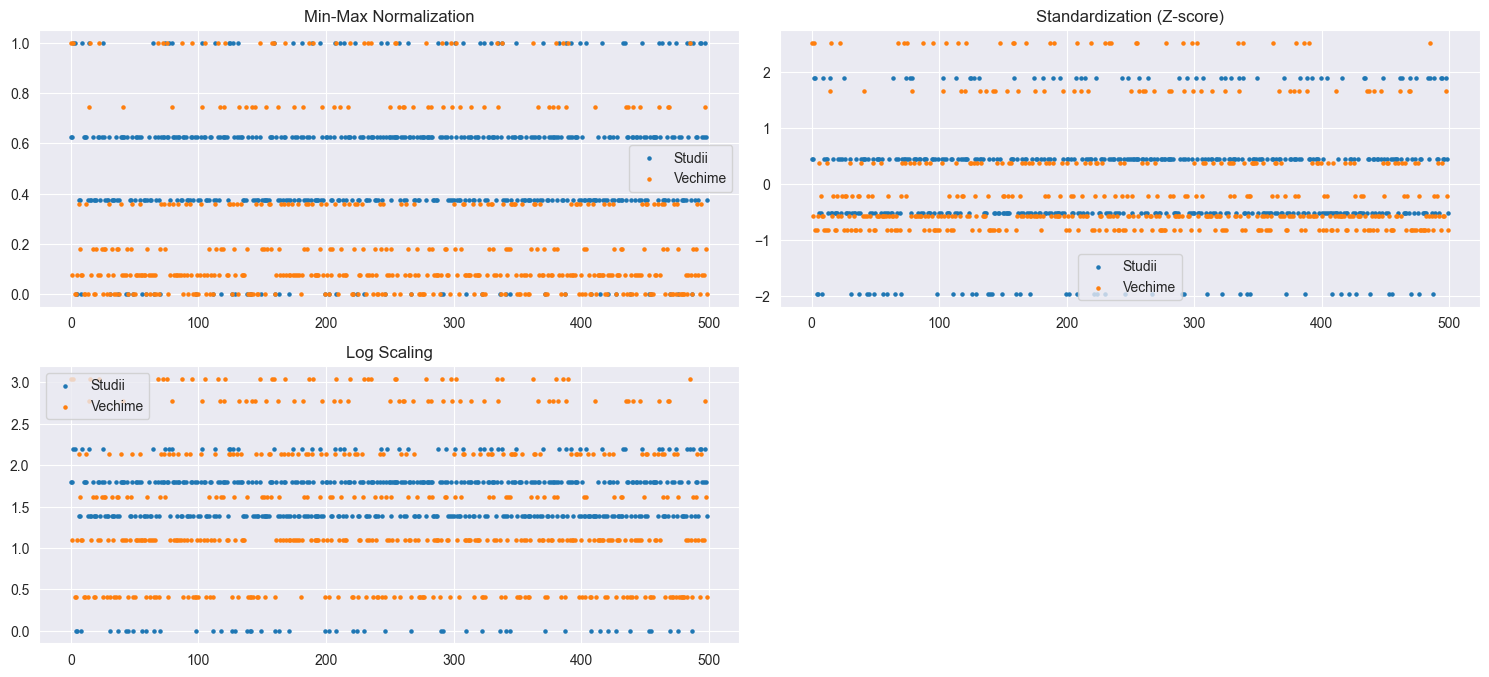

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("data/surveyDataSience.csv", header=[0,1], low_memory=False)
data.columns = data.columns.get_level_values(0)
data = data[1:].reset_index(drop=True)

education_years = {
    "Bachelor’s degree": 3,
    "Master’s degree": 5,
    "Doctoral degree": 8,
    "Professional doctorate": 8,
    "Some college/university study without earning a bachelor’s degree": 0,
    "I prefer not to answer": 0,
    "No formal education past high school": 0
}
data['studii_ani'] = data['Q4'].map(education_years).astype(float)

experience_map = {
    '< 1 years': 0.5,
    '1-3 years': 2,
    '3-5 years': 4,
    '5-10 years': 7.5,
    '10-20 years': 15,
    '20+ years': 20,
}
data['vechime_ani'] = data['Q6'].map(experience_map).astype(float)

to_normalize = data[['studii_ani', 'vechime_ani']].dropna().iloc[:500]

# Normalizare Min-Max
def min_max_scaling(column):
    return (column - column.min()) / (column.max() - column.min())

studii_minmax = min_max_scaling(to_normalize['studii_ani'])
vechime_minmax = min_max_scaling(to_normalize['vechime_ani'])

# Standardizare (Z-score)
def standardization(column):
    return (column - column.mean()) / column.std()

studii_zscore = standardization(to_normalize['studii_ani'])
vechime_zscore = standardization(to_normalize['vechime_ani'])

# Log Scaling
def log_scaling(column):
    return np.log1p(column)  # log(x + 1)

studii_log = log_scaling(to_normalize['studii_ani'])
vechime_log = log_scaling(to_normalize['vechime_ani'])

plt.figure(figsize=(15, 10))

# Min-Max Normalization
plt.subplot(3, 2, 1)
plt.scatter(range(len(studii_minmax)), studii_minmax, label="Studii", s=5)
plt.scatter(range(len(vechime_minmax)), vechime_minmax, label="Vechime", s=5)
plt.title('Min-Max Normalization')
plt.legend()

# Standardization
plt.subplot(3, 2, 2)
plt.scatter(range(len(studii_zscore)), studii_zscore, label="Studii", s=5)
plt.scatter(range(len(vechime_zscore)), vechime_zscore, label="Vechime", s=5)
plt.title('Standardization (Z-score)')
plt.legend()

# Log Scaling
plt.subplot(3, 2, 3)
plt.scatter(range(len(studii_log)), studii_log, label="Studii", s=5)
plt.scatter(range(len(vechime_log)), vechime_log, label="Vechime", s=5)
plt.title('Log Scaling')
plt.legend()

plt.tight_layout()
plt.show()

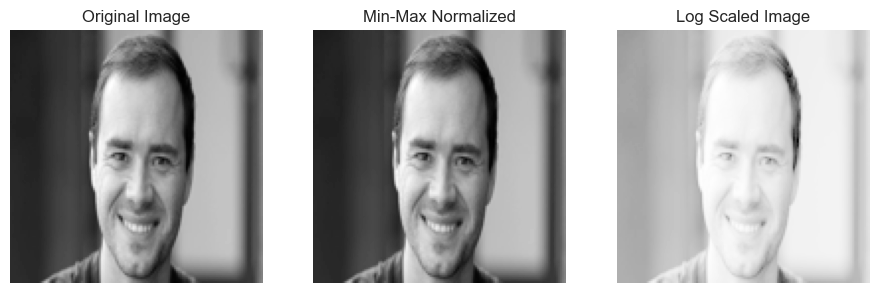

In [37]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image_folder = "data/images"
image_files = [f for f in os.listdir(image_folder) if f.endswith(('jpg', 'png', 'jpeg'))]

image_path = os.path.join(image_folder, image_files[0])
img = Image.open(image_path)

img_resized = img.resize((128, 128))

img_gray = img_resized.convert('L')
img_array = np.array(img_gray)

# 1. Min-Max Scaling
def min_max_normalization(img_array):
    img_min = np.min(img_array)
    img_max = np.max(img_array)
    return (img_array - img_min) / (img_max - img_min)

img_normalized_min_max = min_max_normalization(img_array)

#
# def standardization(img_array):
#     img_mean = np.mean(img_array)
#     img_std = np.std(img_array)
#     return (img_array - img_mean) / img_std
#
# img_normalized_standard = standardization(img_array)

# 3. Log Scaling
def log_scaling(img_array):
    return np.log1p(img_array)  # Log(x + 1)

img_normalized_log = log_scaling(img_array)

plt.figure(figsize=(15, 10))

plt.subplot(2, 4, 1)
plt.imshow(img_array, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Min-Max
plt.subplot(2, 4, 2)
plt.imshow(img_normalized_min_max, cmap='gray')
plt.title("Min-Max Normalized")
plt.axis('off')

# # Standardizare
# plt.subplot(2, 4, 3)
# plt.imshow(img_normalized_standard, cmap='gray')
# plt.title("Standardized Image")
# plt.axis('off')

# Log Scaling
plt.subplot(2, 4, 3)
plt.imshow(img_normalized_log, cmap='gray')
plt.title("Log Scaled Image")
plt.axis('off')

plt.show()

In [35]:
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# from PIL import Image
#
# image_folder = "data/images"
# image_files = [f for f in os.listdir(image_folder) if f.endswith(('jpg', 'png', 'jpeg'))]
#
# plt.figure(figsize=(15, 10))
#
# def min_max_normalization(img_array):
#     img_min = np.min(img_array)
#     img_max = np.max(img_array)
#     return (img_array - img_min) / (img_max - img_min)
#
# def standardization(img_array):
#     img_mean = np.mean(img_array)
#     img_std = np.std(img_array)
#     return (img_array - img_mean) / img_std
#
# def log_scaling(img_array):
#     return np.log1p(img_array)  # Log(x + 1)
#
# for i, image_file in enumerate(image_files):
#     image_path = os.path.join(image_folder, image_file)
#     img = Image.open(image_path)
#
#     img_resized = img.resize((128, 128))
#
#     img_gray = img_resized.convert('L')
#     img_array = np.array(img_gray)
#
#     img_normalized_min_max = min_max_normalization(img_array)
#     img_normalized_standard = standardization(img_array)
#     img_normalized_log = log_scaling(img_array)
#
#     plt.subplot(len(image_files), 4, i*4 + 1)
#     plt.imshow(img_resized, cmap='gray')
#     plt.title(f"Original {i+1}")
#     plt.axis('off')
#
#     plt.subplot(len(image_files), 4, i*4 + 2)
#     plt.imshow(img_normalized_min_max, cmap='gray')
#     plt.title(f"Min-Max {i+1}")
#     plt.axis('off')
#
#     plt.subplot(len(image_files), 4, i*4 + 3)
#     plt.imshow(img_normalized_standard, cmap='gray')
#     plt.title(f"Standardized {i+1}")
#     plt.axis('off')
#
#     plt.subplot(len(image_files), 4, i*4 + 4)
#     plt.imshow(img_normalized_log, cmap='gray')
#     plt.title(f"Log Scaled {i+1}")
#     plt.axis('off')
#
# plt.tight_layout()
# plt.show()

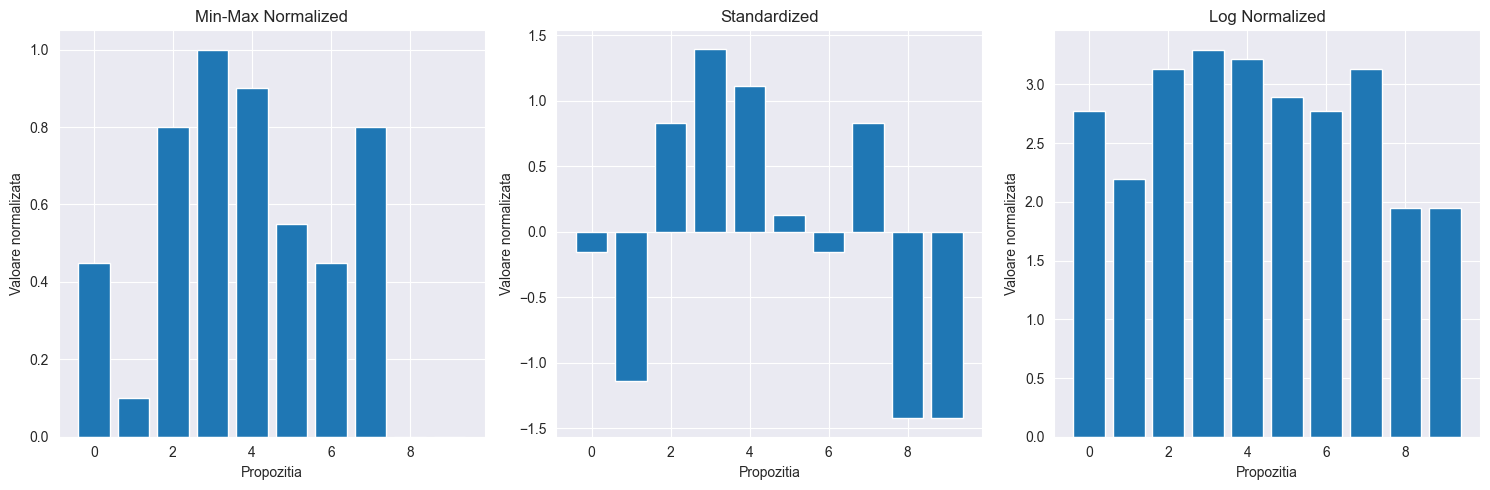

In [34]:
import re
import numpy as np
import matplotlib.pyplot as plt

with open('data/texts.txt', 'r', encoding='utf-8') as file:
    text = file.read()

sentences = re.split(r'[.!?]', text)

word_counts = [len(sentence.split()) for sentence in sentences if sentence]

# 1. Normalizarea Min-Max
def min_max_normalization_word_counts(word_counts):
    wc_min = np.min(word_counts)
    wc_max = np.max(word_counts)
    return [(wc - wc_min) / (wc_max - wc_min) for wc in word_counts]

word_counts_normalized_min_max = min_max_normalization_word_counts(word_counts)

# 2. Standardizare
def standardization_word_counts(word_counts):
    wc_mean = np.mean(word_counts)
    wc_std = np.std(word_counts)
    return [(wc - wc_mean) / wc_std for wc in word_counts]

word_counts_normalized_standard = standardization_word_counts(word_counts)

# 3. Log Scaling
def log_scaling_word_counts(word_counts):
    return [np.log1p(wc) for wc in word_counts]

word_counts_normalized_log = log_scaling_word_counts(word_counts)

plt.figure(figsize=(15, 5))

# Min-Max
plt.subplot(1, 3, 1)
plt.bar(range(len(word_counts)), word_counts_normalized_min_max)
plt.title('Min-Max Normalized')
plt.xlabel('Propozitia')
plt.ylabel('Valoare normalizata')

# Standardizare
plt.subplot(1, 3, 2)
plt.bar(range(len(word_counts)), word_counts_normalized_standard)
plt.title('Standardized')
plt.xlabel('Propozitia')
plt.ylabel('Valoare normalizata')

# Log Scaling
plt.subplot(1, 3, 3)
plt.bar(range(len(word_counts)), word_counts_normalized_log)
plt.title('Log Normalized')
plt.xlabel('Propozitia')
plt.ylabel('Valoare normalizata')

plt.tight_layout()
plt.show()